In [1]:
#Importando as bibliotecas
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importando a base de dados, trantando o nome das colunas e incluindo a coluna 'target'
data = load_iris()
base=pd.DataFrame(data.data)
base.columns = data['feature_names']
base['target']= data.target
base.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [3]:
#verificando as informações da base para verificar se é preciso fazer alguem tratamento na base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


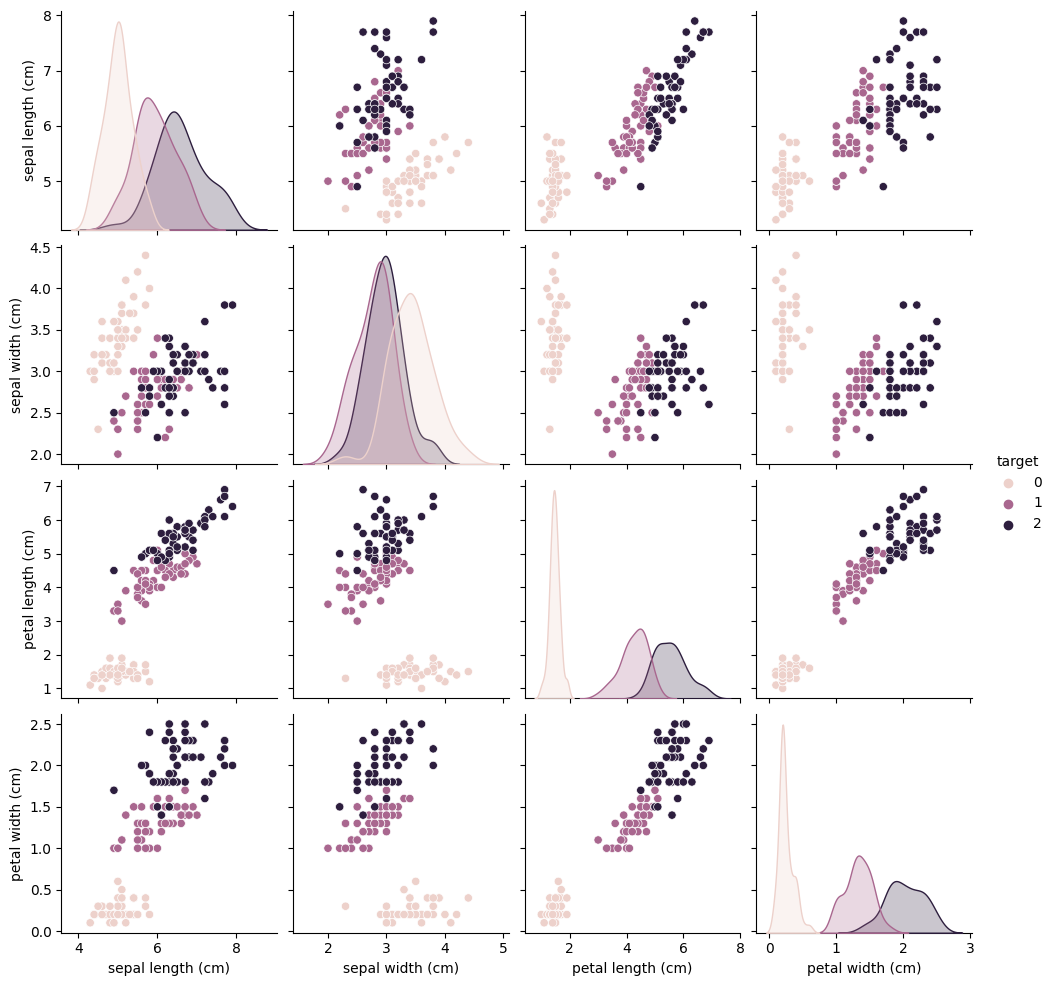

In [4]:
#verificando se existe alguma relação entre os dados para começar a análise
sns.pairplot(base, hue="target");

Text(0.5, 1.0, 'Relação da largura e comprimento da petala')

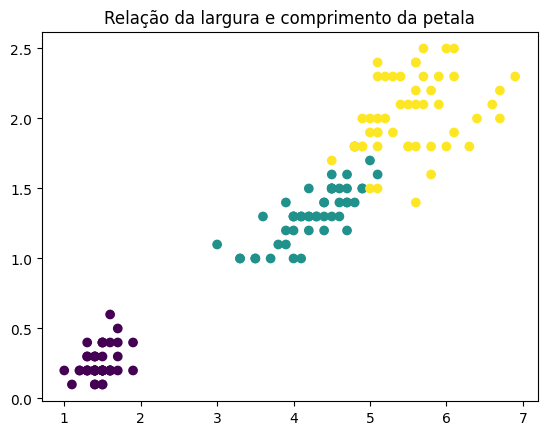

In [5]:
#Acima, podemos observar que existe uma diferenciação nos dados na relação das colunas  'petal length' e 'petal width'
#importando essa relação abaixo para uma melhor visualização
fig,ax = plt.subplots()
#informando os parametros e plotando o grafico de dispersão
x=base['petal length (cm)']
y=base['petal width (cm)']
cor=base.target
ax.scatter(x,y, c=cor)

#Inserindo o titulo
ax.set_title('Relação da largura e comprimento da petala')

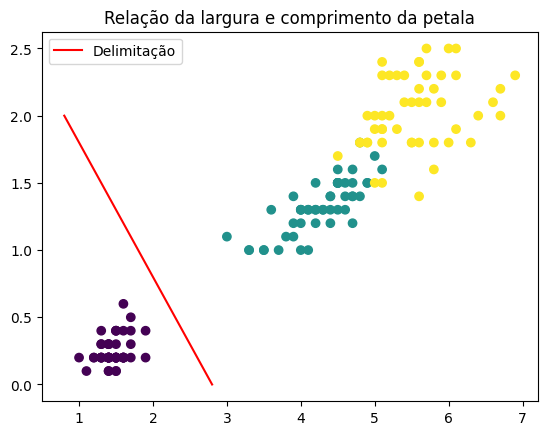

In [35]:
#É perceptivel que existe uma diferença clara da petala de target 0 para as demais, sendo possivel delimitar das demais
fig,ax = plt.subplots()
x=base['petal length (cm)']
y=base['petal width (cm)']
cor=base.target
ax.scatter(x,y, c=cor)
ax.set_title('Relação da largura e comprimento da petala')

#inserindo o grafico da reta para delimitar e adicionando a legenda
k = [0.8, 2.8]
j = [2,0]
ax.plot(k,j,label='Delimitação',c='r')
ax.legend()

plt.show()

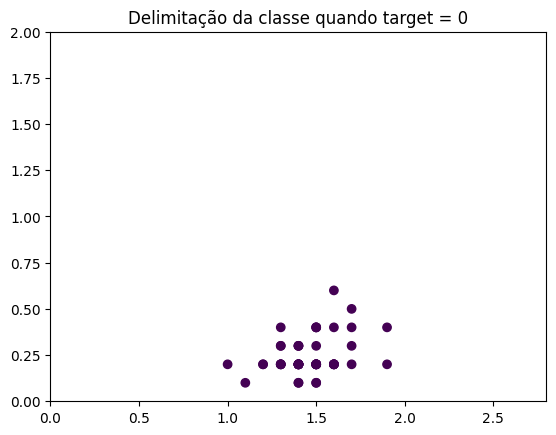

In [62]:
#Conseguimos classificar o target = 0 delimitando suas caracteristica em largura e comprimento de petala
fig,ax = plt.subplots()
x=base['petal length (cm)']
y=base['petal width (cm)']
cor=base.target
ax.scatter(x,y, c=cor)
ax.set(xlim=(0, 2.8),
       ylim=(0, 2))
ax.set_title('Delimitação da classe quando target = 0');

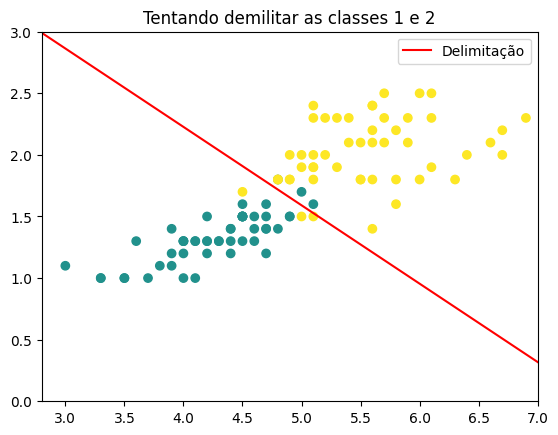

In [63]:
#Porém, essa separação visual não é possivel com os targets igual a 1 e 2
fig,ax = plt.subplots()
x=base['petal length (cm)']
y=base['petal width (cm)']
cor=base.target
ax.scatter(x,y, c=cor)
ax.set(xlim=(2.8, 7),
       ylim=(0, 3))
#inserindo o grafico da reta para delimitar e adicionando a legenda
k = [2, 7.5]
j = [3.5,0]
ax.plot(k,j,label='Delimitação',c='r')
ax.legend()
ax.set_title('Tentando demilitar as classes 1 e 2');

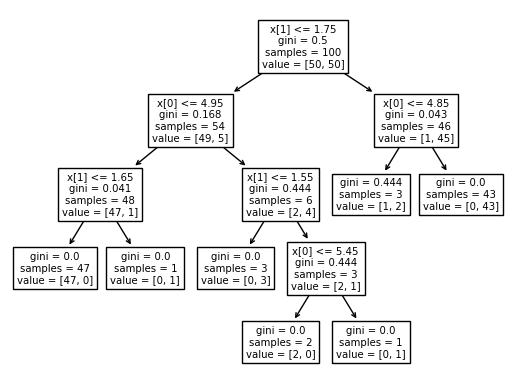

In [18]:
#Para podermos classificar melhor as plantas de target 1 e 2 podemos utilizar o módelo de árvore de decisão.
#Separando os dados para podermos aplicar no módelo, irei criar uma ramificação para não afetar a base original.
base2 = base[base.target != 0]
w = base2[['petal length (cm)','petal width (cm)']]
z = base2.target
#importando o módelo de árvore de decisão e verificando as tomadas de decisão do módelo.
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(w,z)
tree.plot_tree(clftree);

In [64]:
#Com o módelo de árvore gerado acima, podemos fazer a previsão dos dados do nosso modelo
predictTree = clftree.predict(w)
print(predictTree)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [21]:
#Importando a matrix de confusão conseguimos percerber que a Árvore de decisão consegue se ajustar quase que 100% a minha previsão:
from sklearn.metrics import confusion_matrix
confusion_matrix(base2.target, predictTree)

array([[49,  1],
       [ 0, 50]], dtype=int64)

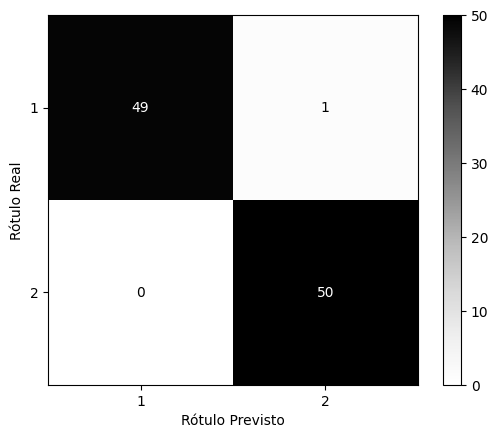

In [85]:
#Com o módelo de árvore de decisão, tivemos apenas 1 amostra classificada de forma errada.
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

predictTree = clftree.predict(w)
cm = confusion_matrix(base2.target, predictTree)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Greys');
plt.ylabel('Rótulo Real');
plt.xlabel('Rótulo Previsto');
plt.xticks(tick_marks, class_labels);
plt.yticks(tick_marks, class_labels);

In [40]:
#Verificando outras metricas:
#Recal
from sklearn.metrics import recall_score
recal=recall_score(base2.target, predictTree,average='micro')
print(f'O Recal é de {recal:.2f} ')
#Acuracy
from sklearn.metrics import accuracy_score
acuracia=accuracy_score(base2.target, predictTree)
print(f'A Acuracia é de {acuracia:.2f} ')
#Precisão
from sklearn.metrics import precision_score
precisao=precision_score(base2.target, predictTree,average='micro')
print(f'A Precisão é de {precisao:.2f} ')

O Recal é de 0.99 
A Acuracia é de 0.99 
A Precisão é de 0.99 
